In [ ]:
from src.loading import load_dataset_subset

dataset_base = r"C:\Users\bianc\Vision\tpf\DETRAC_Upload"

subset = load_dataset_subset(
    base_dir=dataset_base,
    split="train",
    percent=2.0,   # usar 2% del train para pruebas rápidas
    shuffle=True
)

len(subset["image_paths"]), subset["image_paths"][0]



Total imágenes en train: 82085 | Usando: 1641 (2.0%)


(1641,
 WindowsPath('C:/Users/bianc/Vision/tpf/DETRAC_Upload/images/train/MVI_40213_img01155.jpg'))

In [2]:
from src.loading import load_yolo_detector
yolo_model = load_yolo_detector("yolo11s.pt")

Modelo YOLO cargado: yolo11s.pt


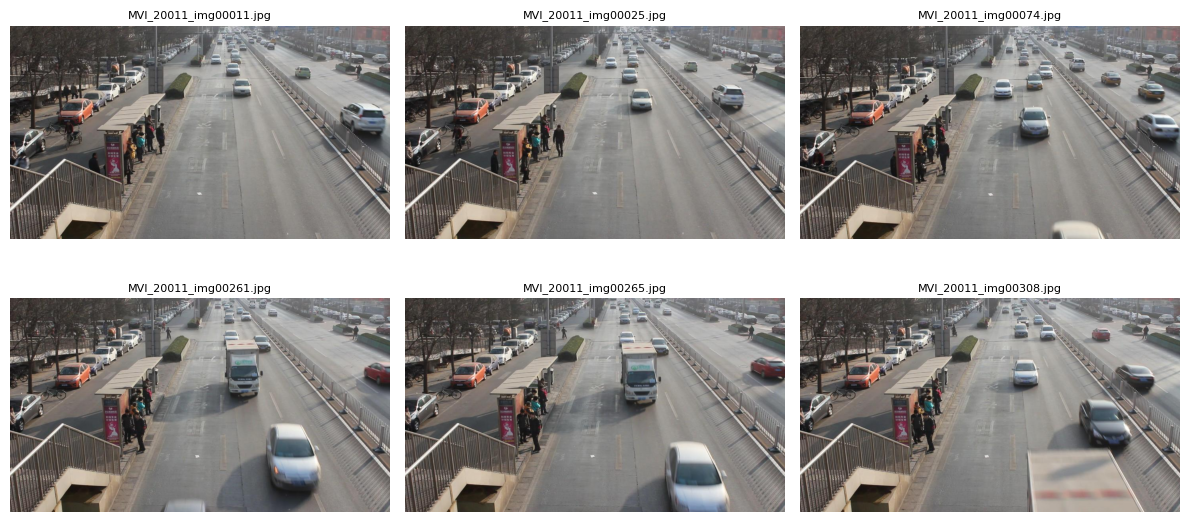

In [3]:
from src.visualization import preview_sequence_grid

# Mostrar 6 imágenes de la secuencia MVI_20011 en un grid 2x3
preview_sequence_grid(
    image_paths=subset["image_paths"],
    sequence_filter="MVI_20011",  # o None si querés mezclar de todas las secuencias
    n_rows=2,
    n_cols=3,
    random_sample=False          # True si querés 6 frames al azar
)


In [ ]:
from pathlib import Path

from src.training import create_yolo_subset_config, finetune_yolo_model
from src.visualization import plot_yolo_predictions_grid

# Ruta donde querés guardar el data.yaml y los .txt de subset
project_root = Path(r"C:\Users\bianc\Vision\tpf")
data_yaml_path = project_root / "ua_detrac_subset.yaml"

# 1) Crear config YOLO para entrenar sólo con el subset actual (2% del train)
yaml_path, train_txt, val_txt = create_yolo_subset_config(
    image_paths=subset["image_paths"],
    yaml_path=data_yaml_path,
    # si querés cambiar el split interno train/val, tocas train_ratio
    train_ratio=0.8,
)

# 2) Fine-tuning rápido (pocas epochs, subset chiquito)
results = finetune_yolo_model(
    model=yolo_model,           # el que cargaste en la celda 1
    data_yaml_path=yaml_path,
    epochs=3,                   # para probar; luego podés subirlo
    imgsz=640,
    batch=4,
    project="runs",
    name="ua_detrac_subset_exp1",
)

# 3) Visualizar cómo quedó el modelo en 6 imágenes de MVI_20011
plot_yolo_predictions_grid(
    model=yolo_model,
    image_paths=subset["image_paths"],
    n_rows=2,
    n_cols=3,
    conf=0.25,
    sequence_filter="MVI_20011",   # o None para mezclar todo
)
